# Задача 2

In [111]:
%matplotlib inline
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import collections
import math


def sample_mean(ls):
    return sum(ls) / len(ls)


def sample_varience_unbiased(ls):
    mean = sample_mean(ls)
    i = 0
    for e in ls:
        i += (mean - e)**2
    return i / (len(ls) - 1)


def print_iterable(iterable, in_one_line):
    if not isinstance(iterable, collections.Iterable):
        raise TypeError("Argument should be iterable")
    iter = 0
    for i in iterable:
        iter += 1
        print(i, '\t', end='')
        if iter % in_one_line == 0:
            print()

# Generates needed selection of random variable X (X - param ~ t4)


def gen_selection(freedom_degr, param, size):
    sel = st.t.rvs(df=freedom_degr, size=size)
    sel = [i + param for i in sel]
    return sel

# Tests provided selection's sample mean with population mean at the
# significance level


def test_mean(sel, pop_mean, level):
    n = len(sel)
    s_mean = sample_mean(sel)
    sigma = sample_varience(sel)
    left_border = st.t.ppf(level / 2, n - 1)
    right_border = st.t.ppf(1 - level / 2, n - 1)
    statistic = (s_mean - pop_mean) * (n**(1 / 2))
    return left_border <= statistic <= right_border

# Computes probability of type I error


def type_1_error(repeats, sel_size, freedom_degr, param, hyp_mean, level):
    errors = 0
    for i in range(repeats):
        if not test_mean(gen_selection(freedom_degr, param, sel_size), hyp_mean, level):
            errors += 1
    return errors / repeats


def power_function(repeats, sel_size, freedom_degr, hyp_mean, level):
    print("Mean\t|\tProbability to reject H0")
    params = []
    probs = []
    for i in range(10, 51, 5):
        param = i / 10
        prob = type_1_error(repeats, sel_size, freedom_degr,
                            param, hyp_mean, level)
        params.append(param)
        probs.append(prob)
        print(param, "\t|\t", prob)
    plt.plot(params, probs)
    plt.show()

# Выборка объёма 8:

In [108]:
estimate = 3
freedom_d = 4
selection8 = gen_selection(freedom_d, estimate, 8)

In [109]:
print_iterable(selection8, 4)

3.33475958531 	4.07196878337 	2.36684329609 	-0.569998917294 	
2.33056581101 	3.83932503524 	2.40060838536 	2.32702299155 	


Проверка на уровне значимости 5% гипотезы о равенстве мат. ожидания трём:

In [113]:
print(test_mean(selection8, 3, 0.05))

True


Повторим эксперимент 10 000 раз и оценим вероятность ошибки первого рода: 

In [116]:
print("Probability of type I error is: ",
      type_1_error(10000, 8, 4, 3, 3, 0.05))

Probability of type I error is:  0.0877


Оценим функцию мощности используемого критерия:

Mean	|	Probability to reject H0
1.0 	|	 0.9885
1.5 	|	 0.9179
2.0 	|	 0.6454
2.5 	|	 0.2493
3.0 	|	 0.0845
3.5 	|	 0.2454
4.0 	|	 0.6368
4.5 	|	 0.918
5.0 	|	 0.9902


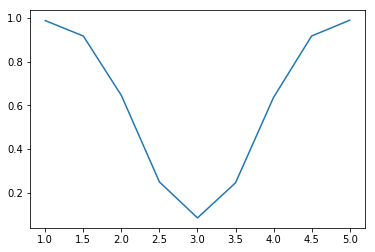

In [117]:
power_function(10000,8,4,3,0.05)

# Выборка объёма 50:

In [120]:
estimate = 3
freedom_d = 4
selection50 = gen_selection(freedom_d, estimate, 50)
print_iterable(selection50, 5)

4.04445344689 	4.06856192297 	4.41055234902 	0.442789833574 	2.08555440725 	
2.55144316591 	1.09680193522 	4.5835135751 	5.02552639801 	2.0557516936 	
1.62530276812 	0.180722593266 	1.66484461723 	5.8493704808 	3.56470708463 	
3.72612993216 	3.61546374286 	2.96343726508 	3.55058305248 	3.6843852631 	
4.59018767854 	2.82629729995 	4.90977295392 	3.08379433228 	4.62737447256 	
4.23024063077 	-1.64509869391 	3.36591885617 	5.34173238692 	5.68377813562 	
3.36149130621 	2.86341140381 	5.16124938713 	2.94255141121 	4.29254339414 	
2.13150695151 	2.5277286091 	2.86826535885 	2.88884529263 	3.36683432764 	
2.02598975975 	1.92676516476 	2.66799332402 	2.67452345883 	3.10572604457 	
2.37955269981 	2.86763992715 	3.31354993527 	4.49356726583 	4.03939363094 	


Проверка на уровне значимости 5% гипотезы о равенстве мат. ожидания трём:

In [121]:
print(test_mean(selection50, 3, 0.05))

True


Повторим эксперимент 10 000 раз и оценим вероятность ошибки первого рода: 

In [122]:
print("Probability of type I error is: ",
      type_1_error(10000, 50, 4, 3, 3, 0.05))

Probability of type I error is:  0.1518


Оценим функцию мощности используемого критерия:

Mean	|	Probability to reject H0
1.0 	|	 1.0
1.5 	|	 1.0
2.0 	|	 0.9997
2.5 	|	 0.865
3.0 	|	 0.1468
3.5 	|	 0.8631
4.0 	|	 0.9995
4.5 	|	 1.0
5.0 	|	 1.0


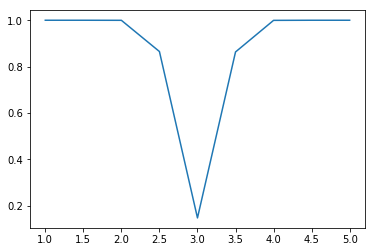

In [123]:
power_function(10000,50,4,3,0.05)